<table align = "center" width = 100% >
    <tr>
        <td width=20%>
            <img src = "https://madhyapradesh.pscnotes.com/wp-content/uploads/2020/05/shutterstock_1116673256-1.jpg">
        </td>
        <td>
            <div align = "center">
                <font color = "#CD853F" size = 24px face = "Comic Sans MS">
                    <b> Crop Production Prediction </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
pd.options.display.max_rows = 50
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [15,5]

## Read Data

In [4]:
crop_data_all = pd.read_csv("crop_production.csv")
crop_data_all.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00


In [5]:
for i in crop_data_all.columns:
    print(f"Number of {i} is {len(crop_data_all[i].unique())}")


Number of State_Name is 33
Number of District_Name is 646
Number of Crop_Year is 19
Number of Season is 6
Number of Crop is 124
Number of Area is 38442
Number of Production is 51628


## Exploratory Data Analysis and Data Preparation

In [6]:
crop_data_all.shape

(246091, 7)

We can see that it is such a huge dataset and we need to study it so we can get insights and develop an useful machine learning model out of it. 

In [7]:
crop_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


- The dataset has seven variables, with 246091 instances. 
- There are 4 variables having "object"  datatype viz. 'State_Name', "District_Name", "Season" and  "Crop" , which are discrete and nominal categorical variables. 
- The variable "Crop_Year" is actually a datetime variable but in this case it is quantitative, discrete and nominal. Nominal variables are categorical. Thus we need to change its datatype to 'object'.
- The remaining variables "Area" and "Production" are continuous numerical variables. 
- We can observe that all variables except "Production" have all non-null values.

### Check for null_values and remove them

In [8]:
crop_data_all.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
crop_data = crop_data_all.dropna()
crop_data = crop_data.reset_index(drop = True)
crop_data.shape

(242361, 7)

In [10]:
crop_data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Appropriating Data Types

In [11]:
crop_data["Crop_Year"]=crop_data["Crop_Year"].astype("object")

In [12]:
crop_data.dtypes

State_Name        object
District_Name     object
Crop_Year         object
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

### Descriptive Statistics and Visualisation

**Numerical Variables**

In [13]:
crop_data.describe()

,Area,Production
count,242361.00,242361.00
mean,12167.41,582503.44
std,50857.44,17065813.17
min,0.10,0.00
25%,87.00,88.00
50%,603.00,729.00
75%,4545.00,7023.00
max,8580100.00,1250800000.00


The count gives us number of observations, mean is a measure of central tendency which gives us general value for the variable, standard deviation tells us about spread of the data i.e how far/close are other observations from the mean. Further min represents the lowest value, 25% is the first quartile (median of first half of observations), 50% is the second quartile (median of the whole data), 75% is the third quartile (median of second half of observations) and max is the highest value.

- For both the variables standard deviation is much larger than the mean of the data, which implies that data is widely scattered and also there must be outliers. 
- Also the mean of the data points is much greater than the median, which tells us about the skewness of the data. The data is highly skewed and doesn't follow normal distribution(Gaussian).
- The data is right skewed or positively skewed. We  will further plot the histogram.

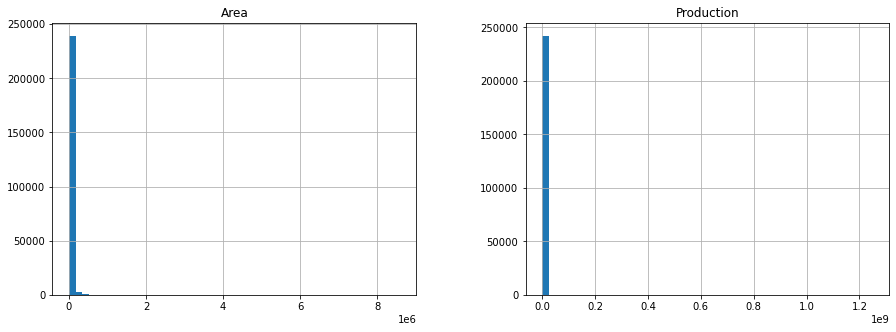

In [14]:
fig =crop_data.hist(bins= 50)

<AxesSubplot:xlabel='Production', ylabel='Density'>

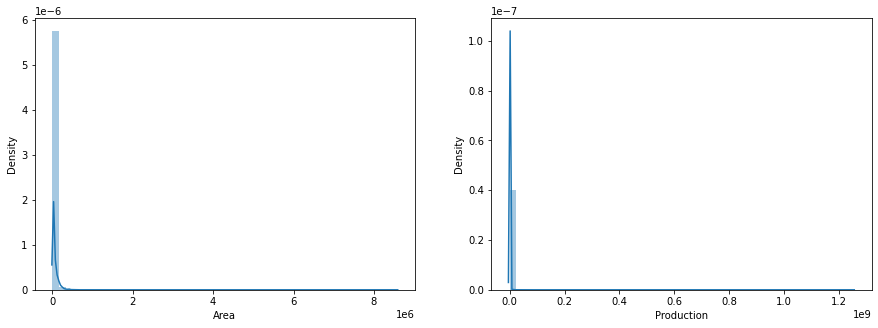

In [15]:

fig,axes = plt.subplots(1,2)

sns.distplot(crop_data.Area, ax = axes[0] )
sns.distplot(crop_data.Production, ax = axes[1])


We can see that for "Area" most of the values range between 0 to 500000 and for "Production" most of the values range from 0 to 1000000. The values of outlier are considerably high but we can't treat them now, because the data consists of all the crops and it won't be a good practice to scale all of their productions and area on same scale.

**Categorical Variables**

In [16]:
crop_data.describe(include = 'object')

,State_Name,District_Name,Crop_Year,Season,Crop
count,242361,242361,242361,242361,242361
unique,33,646,19,6,124
top,Uttar Pradesh,TUMKUR,2003,Kharif,Rice
freq,33189,931,17139,94283,15082


For categorical variables, the count measurement is the same as numerical variables. Unique measurement gives us number of labels or categories in the variable and top gives us the mode of the variable and freq gives us number of occurances of modal value.
- For "State_Name", there are 33 State names (alongwith Union Territories) and Uttar Pradesh is the modal State with 33306 number of observations.
- For "District_Name" there are 646 total districts with TUMKUR the modal value with 945 occurances.
- There are 6 Crop Seasons , and Kharif is the modal season with 95951 observations.
- There are 124 Crop varieties and Rice is the most cultivated with 15104 observations.

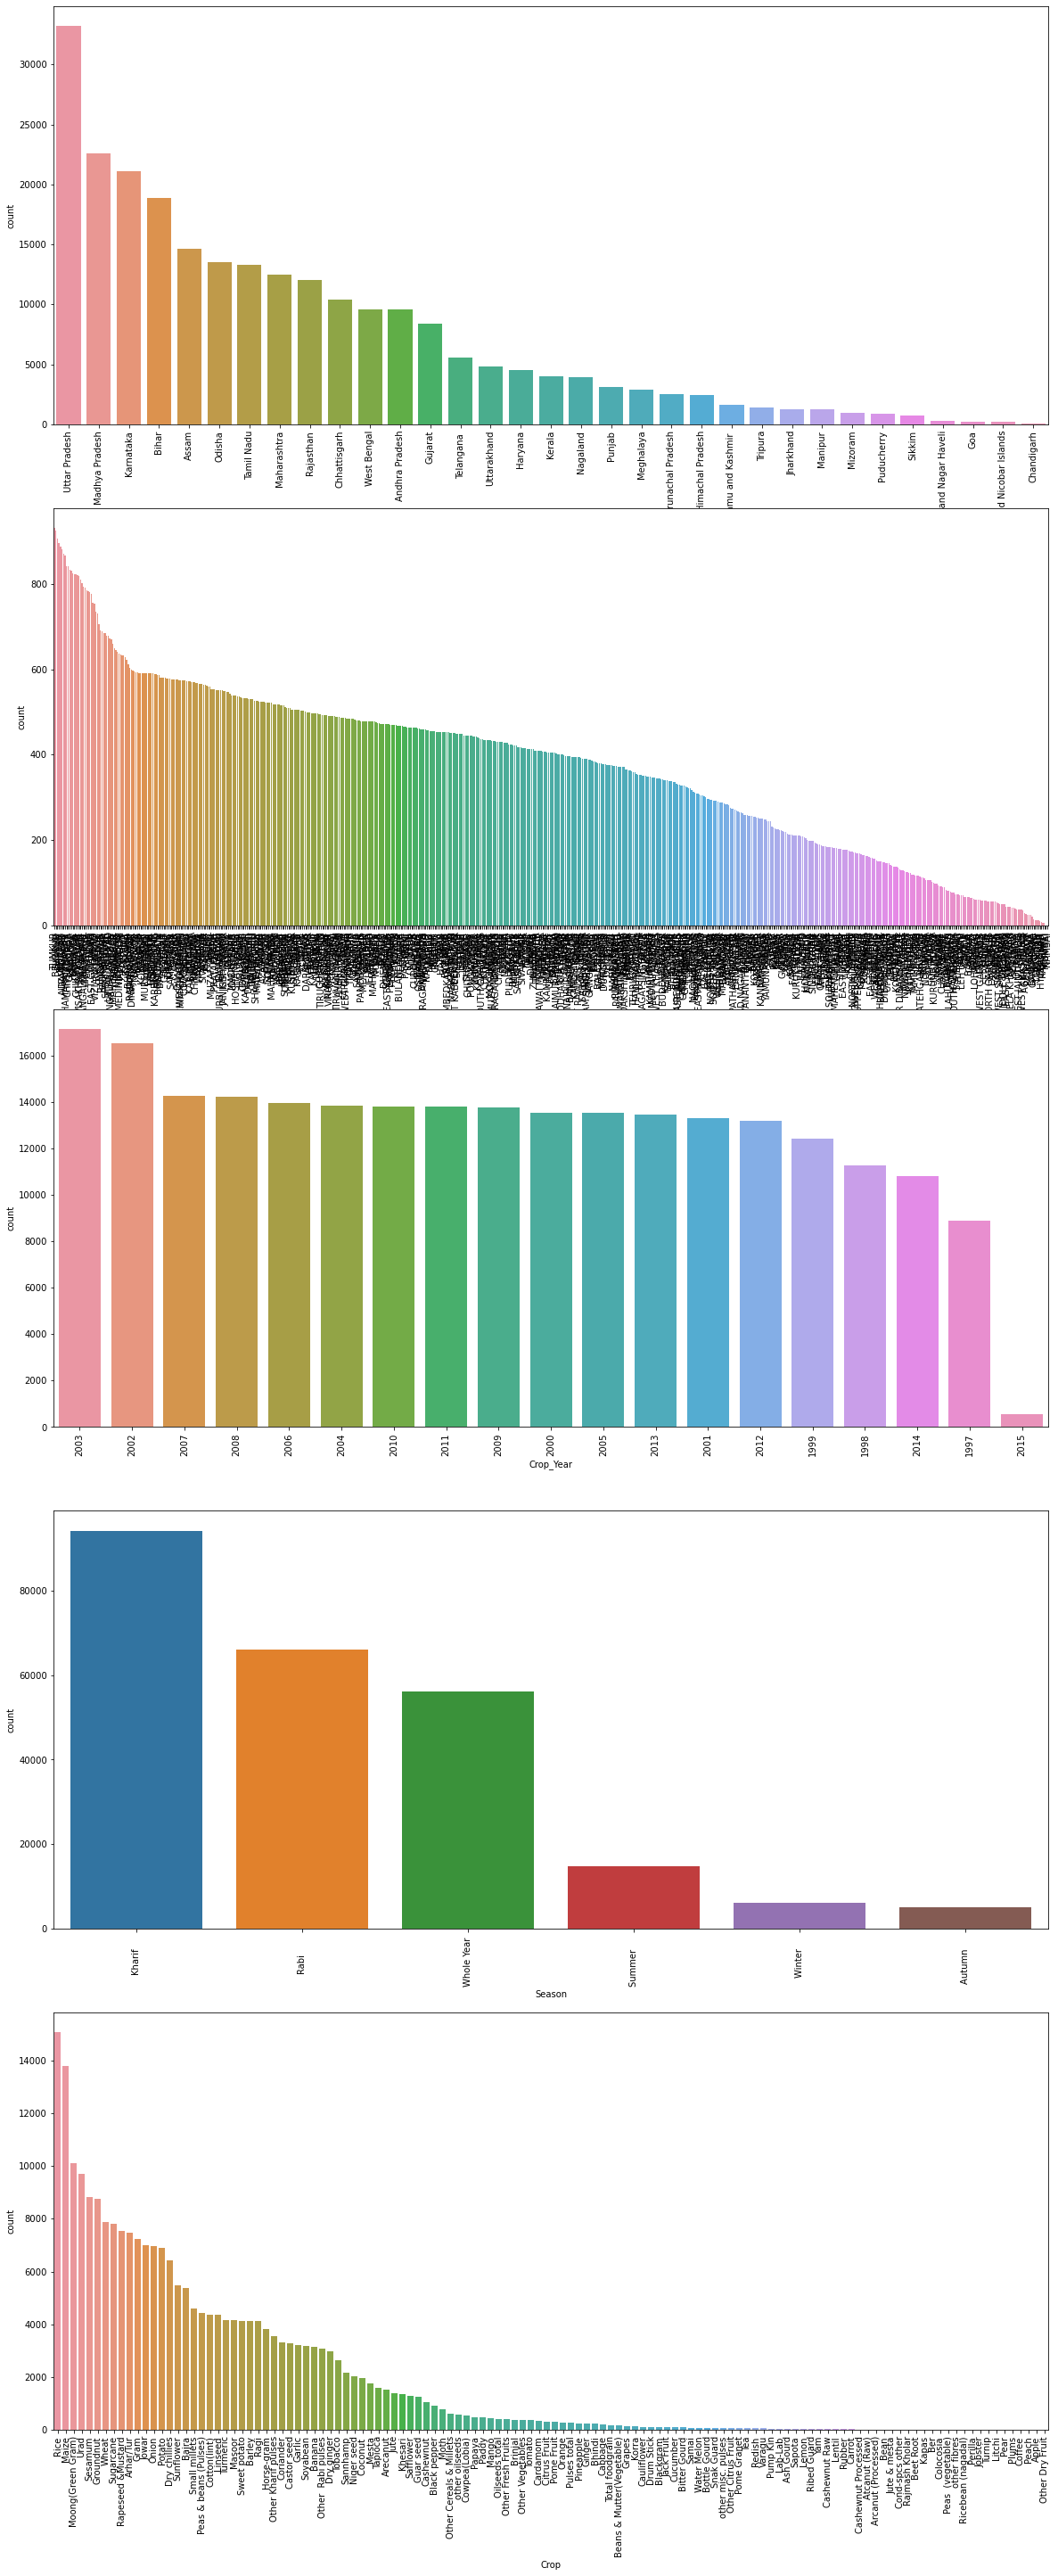

In [17]:
from pandas.api.types import is_object_dtype

cat = []

for col in crop_data :
    if is_object_dtype(crop_data[col]) :
        
        cat.append(col)
        
fig, ax = plt.subplots(nrows= 5, ncols = 1, figsize=(20,50))

for var, sp in zip(cat, ax.flatten()) :
    sns.countplot(crop_data[var], ax=sp, order = crop_data[var].value_counts().index)
    sp.xaxis.set_tick_params(rotation= 90) 
#     sp.set_xticklabels(rotation = 90)


plt.show()

The above plots give us count distribution of categorical variables.
- In all the states, Uttar Pradesh , year 2003 of all years, Kharif of all the crop seasons and  rice of all the crops has highest number of observations.

 **Bivariate Analysis**

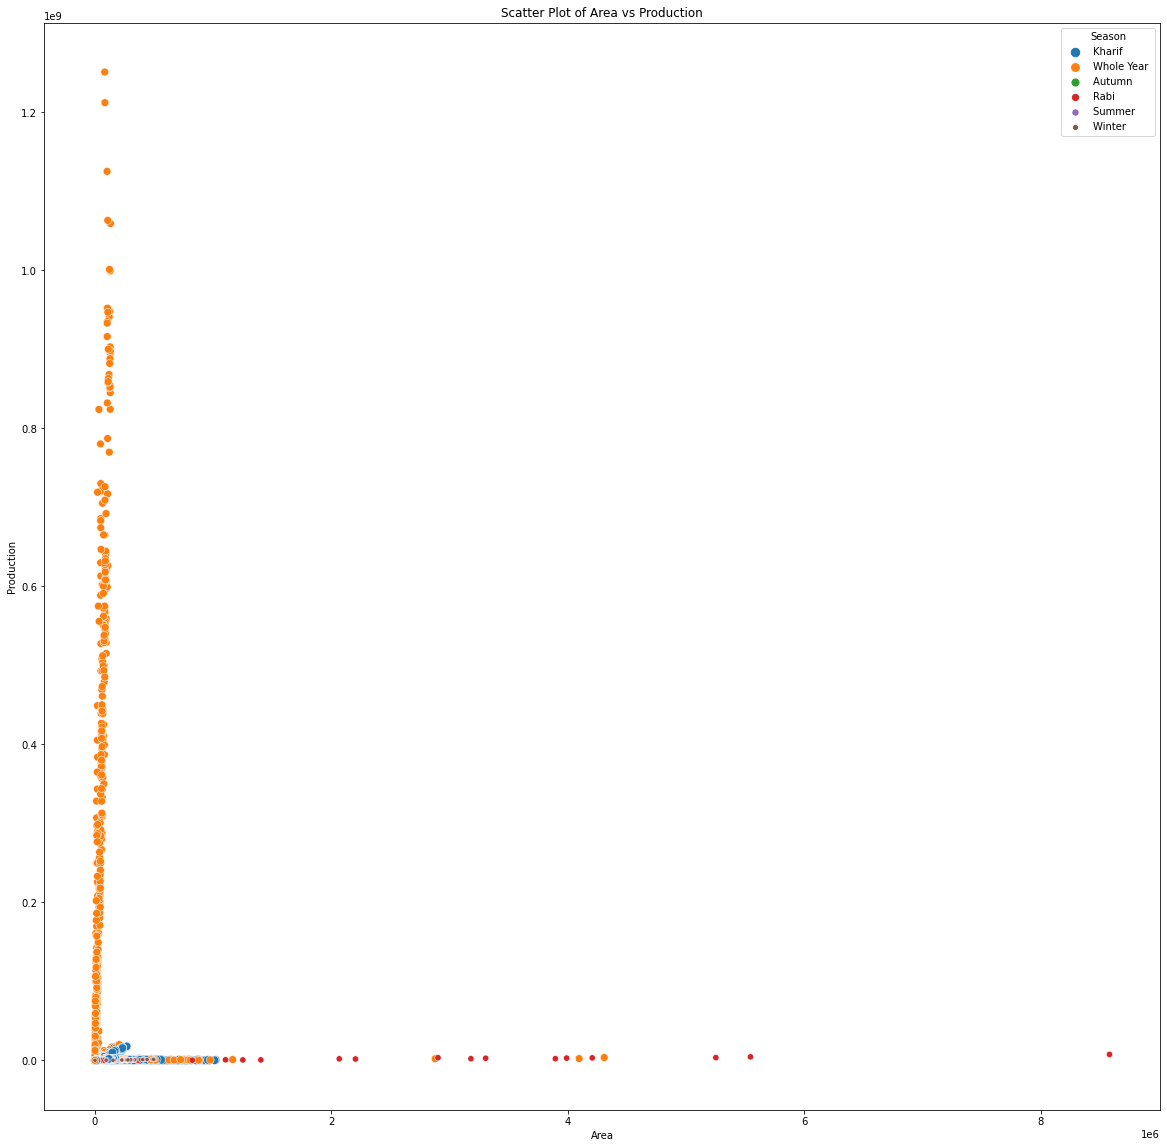

In [18]:
plt.figure(figsize = (20,20))

sns.scatterplot(x = crop_data["Area"], y = crop_data["Production"], hue = crop_data["Season"], size = crop_data["Season"])

# plt.xlabel("Area")
# plt.ylabel("Production")
plt.title("Scatter Plot of Area vs Production")
plt.show()

### Finding out why Steep vertical distribution at the start?

In [19]:
WY_data = crop_data[crop_data["Season"]=="Whole Year"]
WY_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production


We are not able to get new dataframe for just Whole Year seasonal crops. We might have input the wrong string name for Whole Year. Let,s check that.

In [20]:
crop_data["Season"].value_counts().index

Index(['Kharif     ', 'Rabi       ', 'Whole Year ', 'Summer     ',
       'Winter     ', 'Autumn     '],
      dtype='object')

In [21]:
# As the strings have blanks spaces, lets get rid of them.
crop_data["Season"] = crop_data["Season"].str.strip()

In [22]:
# Executing the code again.
WY_data = crop_data[crop_data["Season"]=="Whole Year"]
WY_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.00
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.00,100.00
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.00,2.00
...,...,...,...,...,...,...,...
242223,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.00,11541.00
242254,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.00,20264.00
242286,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.00,11199.00
242321,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.00,7948.00


In [23]:
top = WY_data["Crop"].value_counts() > 1000
Top = np.array(top[top == True].index)
lTop = np.reshape(Top, (16))
Top_crops = list(lTop)
len(Top_crops)

16

In [24]:
TC_data = pd.DataFrame (columns = WY_data.columns)
for i in range(len(Top_crops)):
    TC = WY_data[WY_data["Crop"] == Top_crops[i]]
    TC_data = pd.concat([TC_data, TC])
    
TC_data["Crop"].value_counts()

Sugarcane       6203
Potato          4153
Dry chillies    4039
Onion           3957
Turmeric        3643
Sweet potato    3178
Coriander       2776
Banana          2739
Garlic          2660
Tobacco         2057
Coconut         1945
Dry ginger      1606
Arecanut        1404
Sannhamp        1305
Tapioca         1280
Cashewnut       1008
Name: Crop, dtype: int64

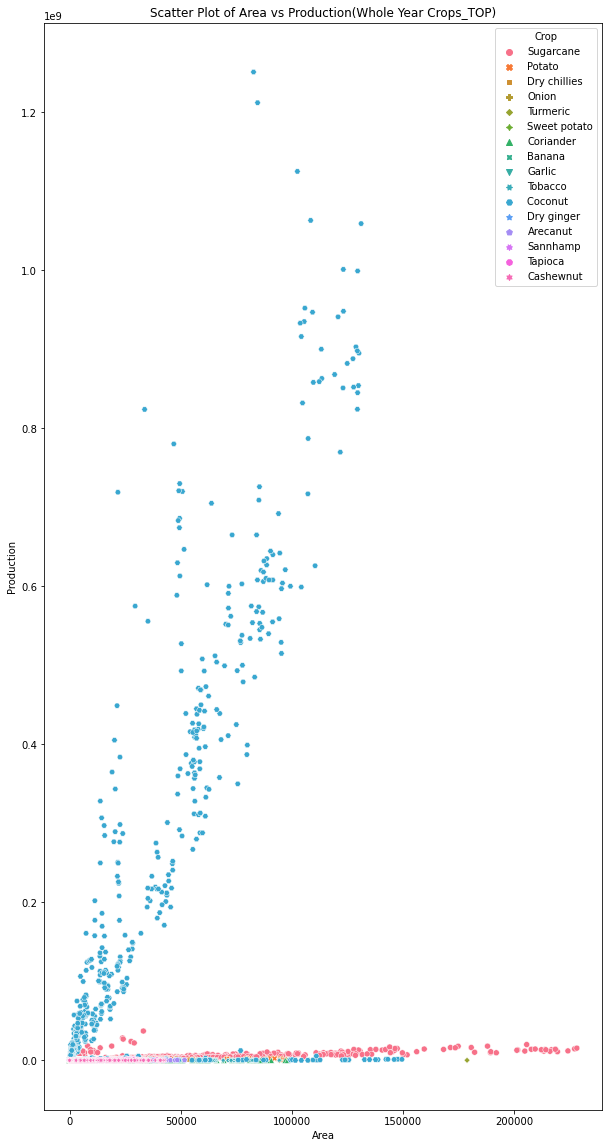

In [25]:
# Let's do scatter plot for Whole Year  Area and Production.
plt.figure(figsize = (10,20))

sns.scatterplot(x = TC_data["Area"], y = TC_data["Production"], hue = TC_data["Crop"], style = TC_data["Crop"])

plt.title("Scatter Plot of Area vs Production(Whole Year Crops_TOP)")
plt.show()

We did all this, because in first scatter plot we observed some ambiguity that something caused scatter plot to rise in production steeply over very small rise in Area. Thus we breaked it down and it is evident that **"Coconut"** crop caused it. Thus production(tonnes) of coconut is more for comparatively less area than all other crops.

We will drop the District_Name variable to simplify the dataset. And we will group the data by other variables.

In [26]:
crop_data1 = crop_data.drop(columns = ["District_Name"])
crop_data_agg = crop_data1.groupby(["State_Name","Crop_Year","Season","Crop"], as_index=False).sum()
crop_data_agg.head()

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,4354.00,7200.00
1,Andaman and Nicobar Islands,2000,Kharif,Other Kharif pulses,670.00,449.00
2,Andaman and Nicobar Islands,2000,Kharif,Rice,10881.00,32184.00
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,1707.00,12714.00
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,800.00,219.00


In [27]:
crop_data_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15411 entries, 0 to 15410
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State_Name  15411 non-null  object 
 1   Crop_Year   15411 non-null  int64  
 2   Season      15411 non-null  object 
 3   Crop        15411 non-null  object 
 4   Area        15411 non-null  float64
 5   Production  15411 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 842.8+ KB


In [28]:
crop_data_agg["Crop_Year"]=crop_data_agg["Crop_Year"].astype("object") 
crop_data_agg.dtypes

State_Name     object
Crop_Year      object
Season         object
Crop           object
Area          float64
Production    float64
dtype: object

## Now we will get some insights from the data.

### Leading States

In [29]:
state_prod = crop_data_agg.groupby(["State_Name"]).sum()
state_prod.head()

,Area,Production
State_Name,,
Andaman and Nicobar Islands,337083.40,718223239.99
Andhra Pradesh,131507319.00,17324590296.00
Arunachal Pradesh,4364340.00,6823912.60
Assam,70378752.00,2111751759.00
Bihar,128269529.00,366483596.66


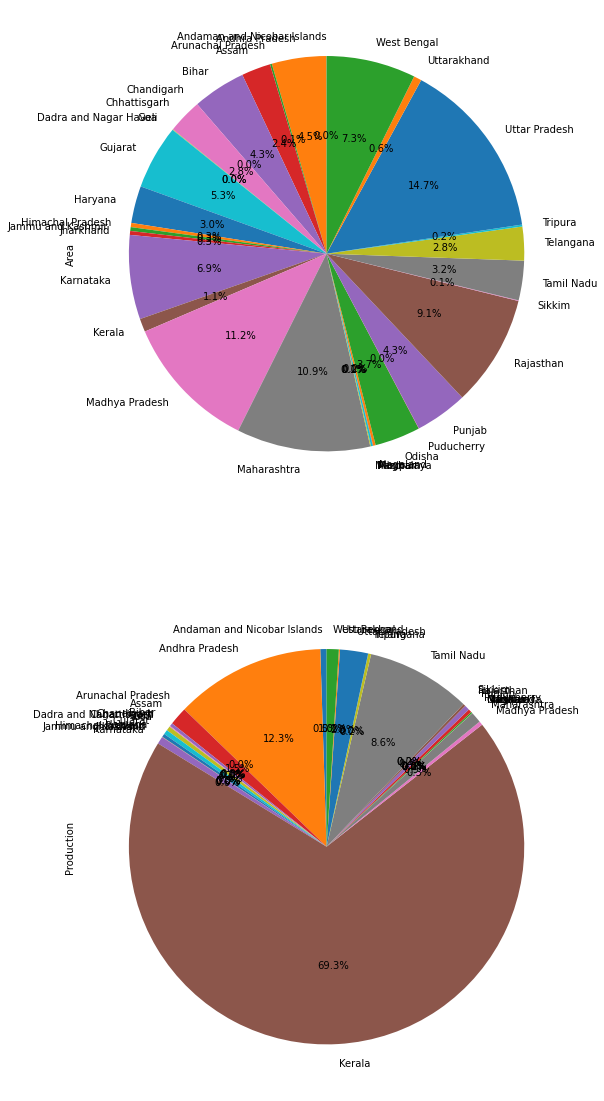

In [30]:
fig,axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,20))

for var, sp in zip(state_prod.columns, axs.flatten()) :
    state_prod[var].plot(kind='pie', ax = sp, startangle = 90,  autopct = '%1.1f%%')

plt.show()

As observed in Piecharts above, we can stay that **Uttar Pradesh** State leads in total area  and **Kerala** leads in total production in tons.

### Production and Cultivation by Year

In [31]:
year_prod = crop_data_agg.groupby(["Crop_Year"]).sum()
year_prod.head()

,Area,Production
Crop_Year,,
1997,231715046.00,851232906.00
1998,166631554.00,5825320640.40
1999,158612474.00,6434665985.10
2000,165289840.00,7449709127.10
2001,165292712.67,7465540840.27


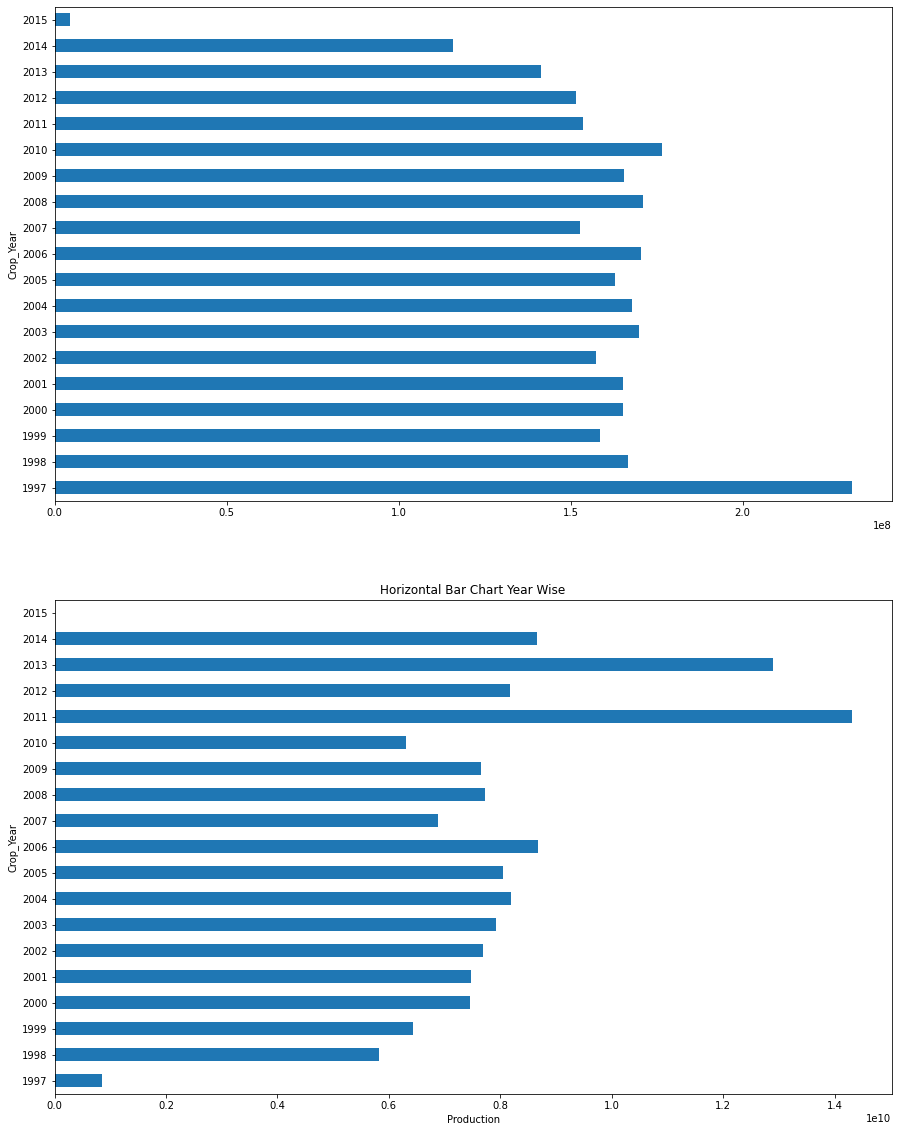

In [32]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,20))

for var, sp in zip(year_prod.columns, axs.flatten()) :
    year_prod[var].plot(kind='barh', ax = sp)
    plt.xlabel(var)
    plt.title("Horizontal Bar Chart Year Wise")


plt.show()


- We can see that, area under cultivation was highest in **1997**, and it decreased in future.
- The production of year **2011** was highest.

###  Production and Cultivation by Season

In [33]:
seas_prod = crop_data_agg.groupby(["Season"]).sum()
seas_prod.head()

,Area,Production
Season,,
Autumn,48069090.33,64413768.22
Kharif,1403367159.76,4029970242.70
Rabi,947909103.69,2051687553.08
Summer,75314111.64,170657925.03
Whole Year,254649415.69,134424837450.19


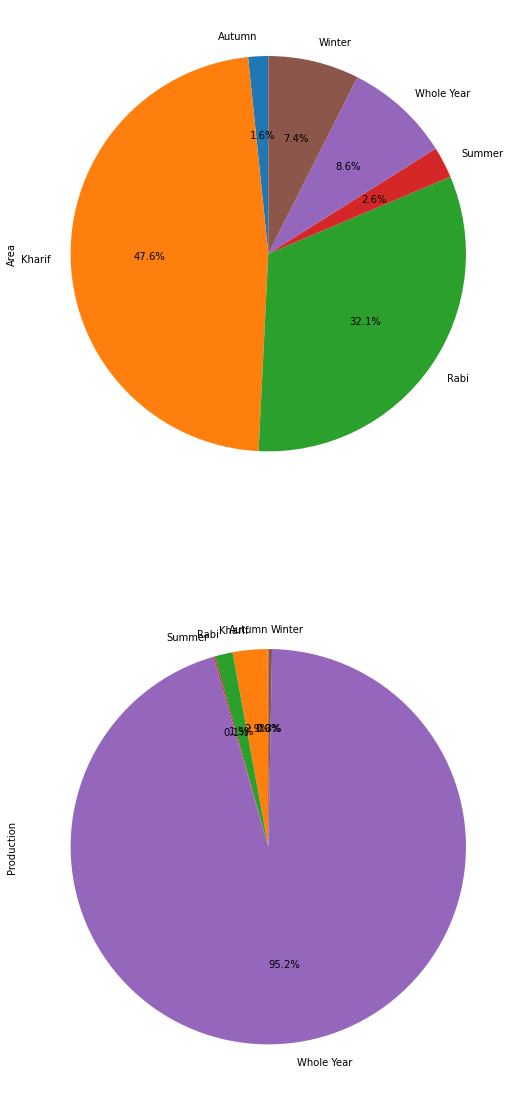

In [34]:
fig,axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,20))

for var, sp in zip(seas_prod.columns, axs.flatten()) :
    seas_prod[var].plot(kind='pie', ax = sp, startangle = 90,  autopct = '%1.1f%%')

plt.show()

- **Kharif** Season Crops are cultivated the most over Area almost 50 % followed by **Rabi** Season Crops. **Autumn** season has least share.
- In terms of production, the **Whole Year** seasonal crops have huge production of 95.2 %. **Autumn** seasonal crops have the least.


###  Production and Cultivation by Crop

In [35]:
crop_prod = crop_data_agg.groupby(["Crop"]).sum()
crop_prod.head()

,Area,Production
Crop,,
Apple,9.00,0.00
Arcanut (Processed),144116.00,192831.00
Arecanut,6000993.01,20346591.66
Arhar/Tur,57788325.21,39331390.33
Ash Gourd,1644.00,0.00


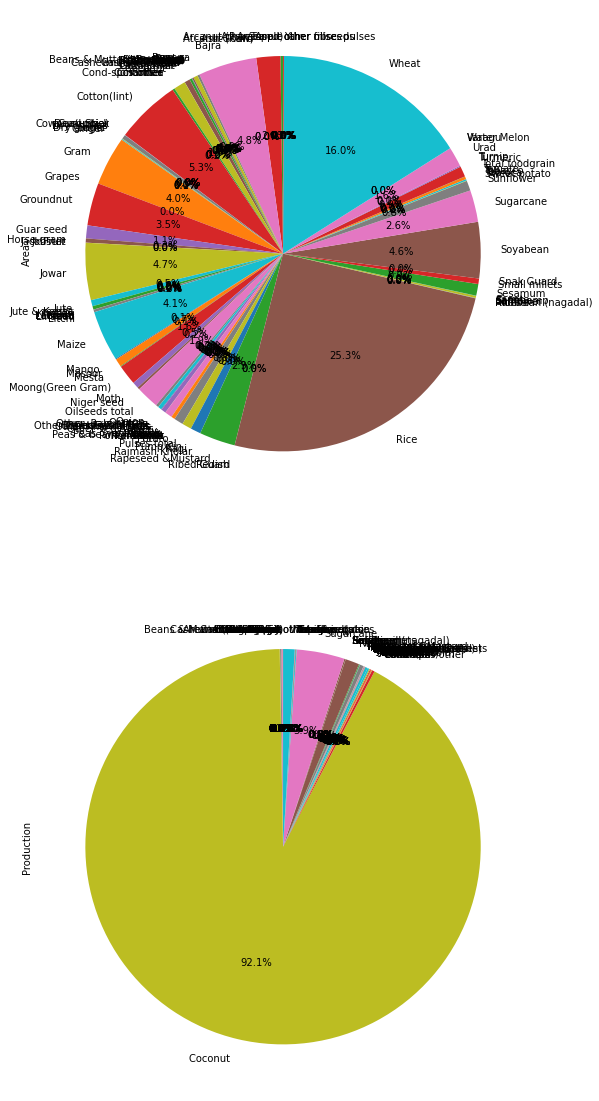

In [36]:
fig,axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,20))

for var, sp in zip(crop_prod.columns, axs.flatten()) :
    crop_prod[var].plot(kind='pie', ax = sp, startangle = 90,  autopct = '%1.1f%%')

plt.show()

In terms of Area in hectares, **Rice** crop is the most cultivated crop 25.3 % of total area. If we look at the production, **Coconut** is the most produced crop in tonnes which is 92.5 % of all the crops.

## Feature Engineering

We can take all the dataset(crop_data) and create our model on it but that would complicate our model because of 133 total number of districts which will create numerous dummies. Thus we will go with statewise grouped data to move ahead.

In [37]:
crop_df = crop_data1[crop_data1["Crop"]=="Rice"].drop(columns=["Crop"]).reset_index(drop=True)
crop_df.head()

,State_Name,Crop_Year,Season,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,102.00,321.00
1,Andaman and Nicobar Islands,2001,Kharif,83.00,300.00
2,Andaman and Nicobar Islands,2002,Kharif,189.20,510.84
3,Andaman and Nicobar Islands,2003,Kharif,52.00,90.17
4,Andaman and Nicobar Islands,2004,Kharif,52.94,72.57


In [38]:
crop_df.shape

(15082, 5)

- **"Production"** variable is production of particular crop for a State, in a crop season of a specific year, in tonnes. Production is simply amount of crop yielded or harvested as whole. But it does not give us comparative idea of net outcome or any qualitative measure. 
- However, **Yield** gives us better measure of the productivity and it will be better practice to use the **Yield** as variable.

In [39]:
cy = (crop_df["Production"]/ crop_df["Area"])
crop_df["Yield"] = [cy[i] for i in range(len(cy))]

In [40]:
crop_df.head()

,State_Name,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Islands,2000,Kharif,102.00,321.00,3.15
1,Andaman and Nicobar Islands,2001,Kharif,83.00,300.00,3.61
2,Andaman and Nicobar Islands,2002,Kharif,189.20,510.84,2.70
3,Andaman and Nicobar Islands,2003,Kharif,52.00,90.17,1.73
4,Andaman and Nicobar Islands,2004,Kharif,52.94,72.57,1.37


We can also check for yields of different states. For example we will have look at yields of different Crops.

In [41]:
yield_crop = crop_df.groupby(["Season"]).sum()
yield_crop

,Area,Production,Yield
Season,,,
Autumn,39967069.80,51853755.54,2955.55
Kharif,420077217.93,941656588.85,14003.68
Rabi,23943732.00,84121333.00,2150.13
Summer,52090565.64,127702773.53,6800.94
Whole Year,7304836.00,18566447.00,247.14
Winter,202935194.93,381569485.45,3931.35


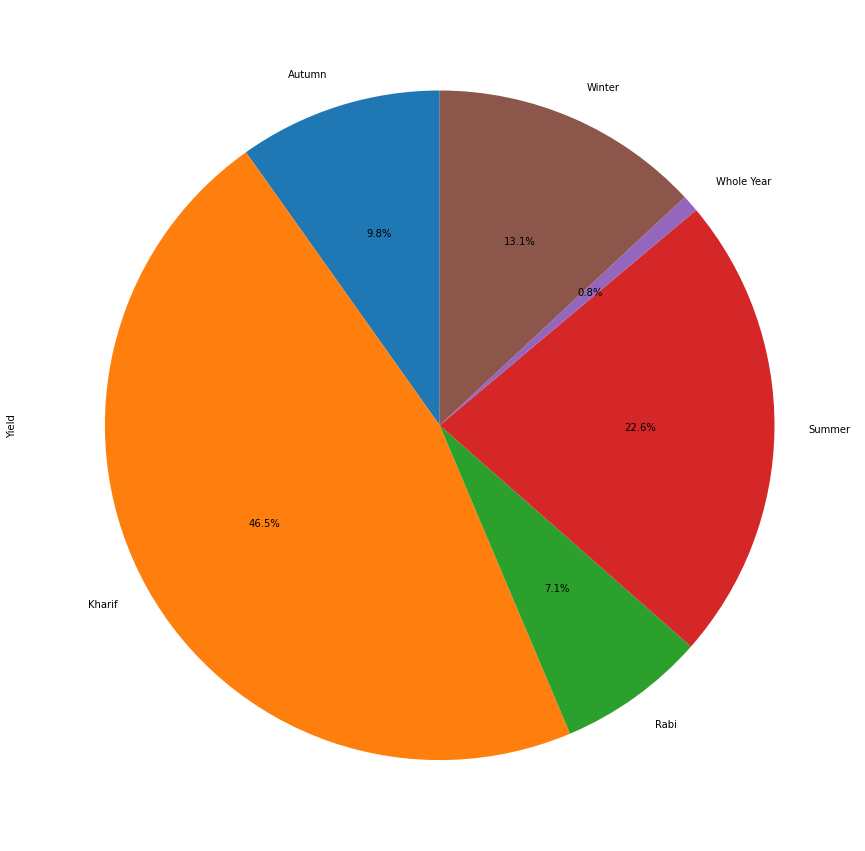

In [42]:
yield_crop["Yield"].plot(kind='pie', figsize=(15,20), startangle = 90, autopct = '%1.1f%%')
plt.show()

In [43]:
crop_df.corr()

,Area,Production,Yield
Area,1.00,0.87,0.05
Production,0.87,1.00,0.19
Yield,0.05,0.19,1.00


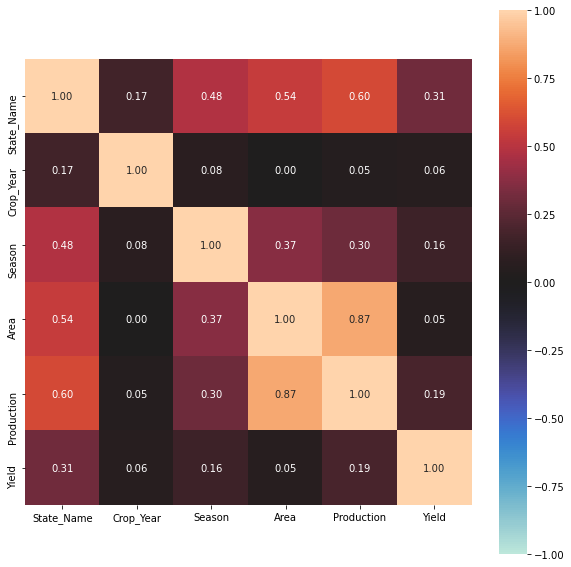

In [44]:
from dython.nominal import associations

complete_correlation = associations(crop_df, filename = 'comp_corr.png', figsize = (10,10))


## Pre-processing Data

**Seperate Categorical and Numerical Variables**

In [45]:
crop_data_cat = crop_df.select_dtypes(include = 'object')
crop_data_cat.head()

,State_Name,Crop_Year,Season
0,Andaman and Nicobar Islands,2000,Kharif
1,Andaman and Nicobar Islands,2001,Kharif
2,Andaman and Nicobar Islands,2002,Kharif
3,Andaman and Nicobar Islands,2003,Kharif
4,Andaman and Nicobar Islands,2004,Kharif


In [46]:
crop_data_num = crop_df.select_dtypes(exclude ='object')
crop_data_num.head()

,Area,Production,Yield
0,102.00,321.00,3.15
1,83.00,300.00,3.61
2,189.20,510.84,2.70
3,52.00,90.17,1.73
4,52.94,72.57,1.37


**Transformation of Numerical Variables**

As our data is highly skewed, we can use Normalization Transfromation to reduce the skewness.

In [47]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler().fit(crop_data_num)
crop_num_scaled = MMS.transform(crop_data_num)
crop_num_scal = pd.DataFrame(crop_num_scaled, columns = ["Area","Production","Yield"])
crop_num_scal.head()

,Area,Production,Yield
0,0.00,0.00,0.01
1,0.00,0.00,0.02
2,0.00,0.00,0.01
3,0.00,0.00,0.01
4,0.00,0.00,0.01


In [48]:
crop_data_dumm = pd.get_dummies(crop_data_cat)
crop_data_dumm.head()

,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Crop_Year_1997,Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,Crop_Year_2007,Crop_Year_2008,Crop_Year_2009,Crop_Year_2010,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
data_final = pd.concat([crop_data_dumm, crop_data_num], axis = 1)
data_final.head()

,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Crop_Year_1997,Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,Crop_Year_2007,Crop_Year_2008,Crop_Year_2009,Crop_Year_2010,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Area,Production,Yield
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,102.00,321.00,3.15
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,83.00,300.00,3.61
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,189.20,510.84,2.70
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52.00,90.17,1.73
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52.94,72.57,1.37


In [50]:
data_final_scal = pd.concat([crop_data_dumm, crop_num_scal], axis=1)
data_final_scal.head()

,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Crop_Year_1997,Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,Crop_Year_2007,Crop_Year_2008,Crop_Year_2009,Crop_Year_2010,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Area,Production,Yield
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.01
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.02
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.01
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.01
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.00,0.01


In [51]:
x = data_final.drop(columns=["Production"])
x.head()

,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Crop_Year_1997,Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,Crop_Year_2007,Crop_Year_2008,Crop_Year_2009,Crop_Year_2010,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Area,Yield
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,102.00,3.15
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,83.00,3.61
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,189.20,2.70
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52.00,1.73
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,52.94,1.37


In [52]:
y = data_final["Production"]
y.head()

0   321.00
1   300.00
2   510.84
3    90.17
4    72.57
Name: Production, dtype: float64

In [53]:
x_scal = data_final_scal.drop(columns=["Production"])
x_scal.head()

,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,State_Name_West Bengal,Crop_Year_1997,Crop_Year_1998,Crop_Year_1999,Crop_Year_2000,Crop_Year_2001,Crop_Year_2002,Crop_Year_2003,Crop_Year_2004,Crop_Year_2005,Crop_Year_2006,Crop_Year_2007,Crop_Year_2008,Crop_Year_2009,Crop_Year_2010,Crop_Year_2011,Crop_Year_2012,Crop_Year_2013,Crop_Year_2014,Crop_Year_2015,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,Area,Yield
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.01
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.02
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.01
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.01
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.00,0.01


In [54]:
y_scal = data_final_scal["Production"]
y_scal.head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: Production, dtype: float64

###  Splitting into train and test data

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

print("x_train shape is : ", x_train.shape)
print("x_test shape is : ", x_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is : ", y_test.shape)

x_train shape is :  (11311, 60)
x_test shape is :  (3771, 60)
y_train shape is :  (11311,)
y_test shape is :  (3771,)


In [56]:
# For Scaled Data
x_train_scal, x_test_scal, y_train_scal, y_test_scal = train_test_split(x_scal, y_scal, test_size = 0.25, random_state = 5)

print("x_train shape is : ", x_train_scal.shape)
print("x_test shape is : ", x_test_scal.shape)
print("y_train shape is : ", y_train_scal.shape)
print("y_test shape is : ", y_test_scal.shape)

x_train shape is :  (11311, 60)
x_test shape is :  (3771, 60)
y_train shape is :  (11311,)
y_test shape is :  (3771,)


In [57]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [58]:
estimators = [LinearRegression(), SGDRegressor(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]

In [59]:
fit_scores = pd.DataFrame(columns = ["Model","Train_Score","Test_Score"])
for i in range(len(estimators)):
    model = estimators[i]
    model.fit(x_train, y_train)
    fit_scores = fit_scores.append({'Model': estimators[i],'Train_Score':model.score(x_train, y_train),'Test_Score':model.score(x_test, y_test)}, ignore_index=True)
    

In [60]:
fit_scores

,Model,Train_Score,Test_Score
0,LinearRegression(),0.85,0.86
1,SGDRegressor(),-6747878121272406729293824.00,-6806753533051709792714752.00
2,Ridge(),0.85,0.86
3,Lasso(),0.85,0.86
4,DecisionTreeRegressor(),1.00,1.00
5,"(DecisionTreeRegressor(max_features='auto', ra...",1.00,1.00
6,SVR(),-0.17,-0.18


- By checking R2 scores for training and testing data for different estimators, we can see that RandomForestRegressor, DecisionTreeRegressor have the best scores followed by LinearRegression, Ridge and Lasso.
- SGDRegressor and SVR have worse scores , they are negative so its better to not consider them.

**For Scaled Data**

In [61]:
fit_scores_scal = pd.DataFrame(columns = ["Model","Train_Score","Test_Score"])
for i in range(len(estimators)):
    model = estimators[i]
    model.fit(x_train_scal, y_train_scal)
    fit_scores_scal = fit_scores_scal.append({'Model': estimators[i],'Train_Score':model.score(x_train_scal, y_train_scal),'Test_Score':model.score(x_test_scal, y_test_scal)}, ignore_index=True)

In [62]:
fit_scores_scal

,Model,Train_Score,Test_Score
0,LinearRegression(),0.85,0.86
1,SGDRegressor(),0.65,0.66
2,Ridge(),0.85,0.86
3,Lasso(),0.00,-0.00
4,DecisionTreeRegressor(),1.00,1.00
5,"(DecisionTreeRegressor(max_features='auto', ra...",1.00,1.00
6,SVR(),0.74,0.72


Here, we can see that SGDRegressor and SVR which were previously invalid model now show a good model score. Thus, Scaling the data has helped. But not for Lasso, where  it does not fit the data.

### Get evaluation metrics

In [63]:
## Function to get Model Performance

from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error

eval_card = pd.DataFrame(columns = ['Model','R2_Score', 'E_V_S', 'MAE', 'MSE', 'RMSE'])

def update_eval_card(model_name):
    
    global eval_card
    
    eval_card = eval_card.append({'Model': model_name,
                                  'R2_Score': r2_score(y_test, y_pred),
                                  'E_V_S': explained_variance_score(y_test, y_pred),
                                  'MAE' : mean_absolute_error(y_test, y_pred),
                                  'MSE': mean_squared_error(y_test, y_pred),
                                  'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)) },
                                ignore_index = True)
    
    return eval_card

In [85]:
eval_card_scal = pd.DataFrame(columns = ['Model','R2_Score', 'E_V_S', 'MAE', 'MSE', 'RMSE'])
# For scaled data
def update_eval_card_scal(model_name):
    
    global eval_card_scal
    
    eval_card_scal = eval_card_scal.append({'Model': model_name,
                                  'R2_Score': r2_score(y_test_scal, y_pred_scal),
                                  'E_V_S': explained_variance_score(y_test_scal, y_pred_scal),
                                  'MAE' : mean_absolute_error(y_test_scal, y_pred_scal),
                                  'MSE': mean_squared_error(y_test_scal, y_pred_scal),
                                  'RMSE': np.sqrt(mean_squared_error(y_test_scal, y_pred_scal)) },
                                ignore_index = True)
    
    return eval_card_scal

##  1.Linear Regression

In [65]:
LR = LinearRegression()

OLS_Model = LR.fit(x_train, y_train)

In [66]:
y_pred = OLS_Model.predict(x_test)
y_pred

array([-11638.21750434, 355532.14400929, -10794.68298583, ...,
       333136.65566999, 115228.36341977,  -8755.82541369])

In [67]:
update_eval_card( model_name = "Linear Regression")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression,0.86,0.86,36238.56,4135610636.71,64308.71


In [68]:
y_test.std()

174569.23256738123

## 2 Linear Regression with Scaled Data

In [69]:
LR_scal = LinearRegression()

OLS_Model_scal = LR_scal.fit(x_train_scal, y_train_scal)

In [70]:
y_pred_scal = OLS_Model_scal.predict(x_test_scal)
y_pred_scal

array([-0.0065155 ,  0.20805359, -0.00653076, ...,  0.19522095,
        0.06687927, -0.00578308])

In [86]:
update_eval_card_scal( model_name = "Linear Regression with Scaled Data")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression with Scaled Data,0.86,0.86,0.02,0.00,0.04


In [87]:
y_test_scal.std()

0.10208727050724051

## 3. Decision Tree Regressor

In [74]:
DTR = DecisionTreeRegressor() #Default parameters

DTR_Model = DTR.fit(x_train, y_train)

In [75]:
y_pred = DTR_Model.predict(x_test)
y_pred

array([  2314., 369500.,   4552., ..., 159000., 108043.,   5604.])

In [76]:
update_eval_card( model_name = "Decision Tree Regressor")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression,0.86,0.86,36238.56,4135610636.71,64308.71
1,Decision Tree Regressor,0.99,0.99,3678.62,163177271.99,12774.09


## 4. Random Forest Regressor

In [77]:
RFR = RandomForestRegressor()

RFR_model = RFR.fit(x_train, y_train)

In [78]:
y_pred = RFR_model.predict(x_test)
y_pred

array([  2235.1534, 361380.54  ,   4445.14  , ..., 169320.37  ,
       111289.74  ,   5670.3005])

In [79]:
update_eval_card( model_name = "Random Forest Regressor")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression,0.86,0.86,36238.56,4135610636.71,64308.71
1,Decision Tree Regressor,0.99,0.99,3678.62,163177271.99,12774.09
2,Random Forest Regressor,1.00,1.00,1392.39,26551162.34,5152.78


## 5. Random Forest Regressor with GridSearchCV

**GridSearchCV**

In [80]:
from sklearn.model_selection import GridSearchCV

In [88]:
tuned_paramaters = [{'n_estimators': [80, 100],
                     'min_samples_split': [10,15],
                     'max_depth': [8, 10]
                    }]

In [103]:
RF_Reg_CV= RandomForestRegressor(random_state = 5)


grid = GridSearchCV(estimator = RF_Reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)


dt_grid = grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100} 



In [104]:
# Build model on Tuned Parameters
RFR_CV = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 5)

RFR_CV_Model = RFR_CV.fit(x_train, y_train)

In [105]:
y_pred = RFR_CV_Model.predict(x_test)
y_pred

array([  2308.88607479, 359617.47821364,   4237.95709233, ...,
       170121.46671578, 112752.18891852,   5506.87449232])

In [106]:
update_eval_card( model_name = "Random Forest Regressor(GridSearchCV)")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression,0.86,0.86,36238.56,4135610636.71,64308.71
1,Decision Tree Regressor,0.99,0.99,3678.62,163177271.99,12774.09
2,Random Forest Regressor,1.00,1.00,1392.39,26551162.34,5152.78
3,Random Forest Regressor(GridSearchCV),1.00,1.00,2058.70,54555968.38,7386.20


## SGDRegressor with Scaled Data

In [90]:
SGDR = SGDRegressor(random_state = 5)

SGDR_Model = SGDR.fit(x_train_scal, y_train_scal)

In [91]:
y_pred_scal = SGDR_Model.predict(x_test_scal)
y_pred_scal

array([-0.02761442,  0.21033439,  0.03009051, ...,  0.22399978,
        0.085322  , -0.01182551])

In [92]:
update_eval_card_scal( model_name = "SGDRegressor with Scaled Data")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression with Scaled Data,0.86,0.86,0.02,0.00,0.04
1,SGDRegressor with Scaled Data,0.66,0.66,0.04,0.00,0.06


## SVR with Scaled Data

In [93]:
svr = SVR()

SVR_model = svr.fit(x_train_scal, y_train_scal)

In [94]:
y_pred_scal = SVR_model.predict(x_test_scal)
y_pred_scal

array([0.07657286, 0.25571528, 0.02613106, ..., 0.17612406, 0.1263671 ,
       0.06418928])

In [95]:
update_eval_card_scal( model_name = "SVR with Scaled Data")

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression with Scaled Data,0.86,0.86,0.02,0.00,0.04
1,SGDRegressor with Scaled Data,0.66,0.66,0.04,0.00,0.06
2,SVR with Scaled Data,0.72,0.81,0.04,0.00,0.05


## Tabulate all the evaluations

In [96]:
eval_all = pd.concat([eval_card,eval_card_scal], axis = 0).reset_index(drop=True)

In [97]:
eval_all

,Model,R2_Score,E_V_S,MAE,MSE,RMSE
0,Linear Regression,0.86,0.86,36238.56,4135610636.71,64308.71
1,Decision Tree Regressor,0.99,0.99,3678.62,163177271.99,12774.09
2,Random Forest Regressor,1.00,1.00,1392.39,26551162.34,5152.78
3,Linear Regression with Scaled Data,0.86,0.86,0.02,0.00,0.04
4,SGDRegressor with Scaled Data,0.66,0.66,0.04,0.00,0.06
5,SVR with Scaled Data,0.72,0.81,0.04,0.00,0.05


## Conclusion

- Looking at R2 Score and Explained Variance Score, Decision Tree Regressor and Random Forest Regressor perform the best with total scores of 1.
- Observing the error terms it is evident that Random Forest Regressor with default parameters has the least errors. 

**RandomForestRegressor** with default parameters is the most suited model for our regression task.

We can compare the RMSE with Standard Deviation to get a better picture.

In [98]:
y_hat = RFR_model.predict(x_test)
y_hat # Predicted Values

array([  2235.1534, 361380.54  ,   4445.14  , ..., 169320.37  ,
       111289.74  ,   5670.3005])

In [99]:
y_true = y_test.reset_index(drop=True)  #true values
y_true

0        2214.00
1      360599.00
2        4445.00
3      315702.00
4       46500.00
          ...   
3766     4836.00
3767    52647.00
3768   169000.00
3769   112523.00
3770     5762.00
Name: Production, Length: 3771, dtype: float64

In [100]:
# Standard Deviation of y_true
SD = y_true.std()
SD

174569.23256738123

In [101]:
RMSE_RFR = np.sqrt(mean_squared_error(y_true, y_hat))
RMSE_RFR

5152.782000406975

In [102]:
Ratio = SD/RMSE_RFR
Ratio

33.87863731739349

We can see that RMSE is well within Standard Deviation of true values. RMSE is 33.7 times of Standard Deviation of true values. Our model gives us a much precise prediction of production of Rice crop.